In [58]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.feature_extraction.text import CountVectorizer


In [59]:
# Set some Pandas options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 30)
pd.options.mode.chained_assignment = None

#pd.set_option('display.mpl_style', 'default')
matplotlib.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rc_context(rc={'font.family': 'monospace', 
                   'font.weight': 'bold', 
                   'font.size': 10})

In [60]:
test = pd.read_csv("test/test.csv")
train = pd.read_csv("train/train.csv")

In [61]:
print(test.shape)
print(train.shape)

(3972, 23)
(14993, 24)


### EDA

In [62]:
train.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [63]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [64]:
train.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

Text(0.5, 1.0, 'Example of Histogram Plot')

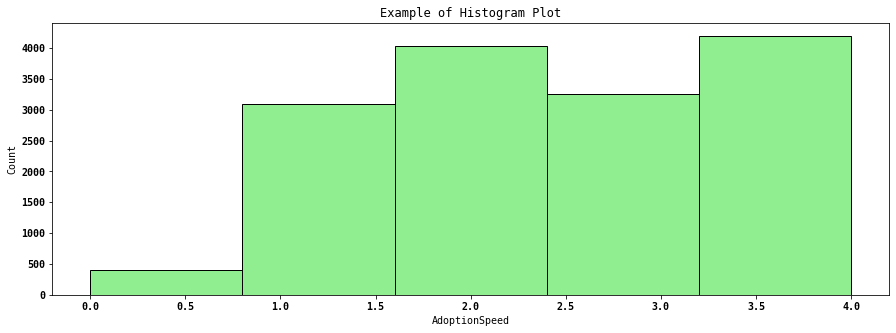

In [65]:
train['AdoptionSpeed'].hist(color='lightgreen',bins=5,ec="k")

plt.grid(False)
# plt.xticks((1,2,3,4,5),('< 1 Day', '1-7 Days','8-30 Days','31-90 Days','>90 Days'))
plt.xlabel("AdoptionSpeed")
plt.ylabel("Count")
plt.title("Example of Histogram Plot")

In [66]:
train.groupby(by="Vaccinated")['Fee'].mean()

Vaccinated
1    35.257884
2    11.647848
3    14.251071
Name: Fee, dtype: float64

In [67]:
def Avg_fee(x):
    print(train.groupby(by=x)['Fee'].mean())
    return 

In [68]:
Avg_fee('Dewormed')

Dewormed
1    29.883530
2     9.186501
3    13.243122
Name: Fee, dtype: float64


In [69]:
train.AdoptionSpeed.astype("category", ordered=True)

C:\Users\kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


0        2
1        0
2        3
3        2
4        2
5        2
6        1
7        3
8        1
9        4
10       1
11       1
12       2
13       1
14       2
        ..
14978    4
14979    4
14980    4
14981    3
14982    3
14983    2
14984    4
14985    4
14986    3
14987    0
14988    2
14989    4
14990    3
14991    4
14992    3
Name: AdoptionSpeed, Length: 14993, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

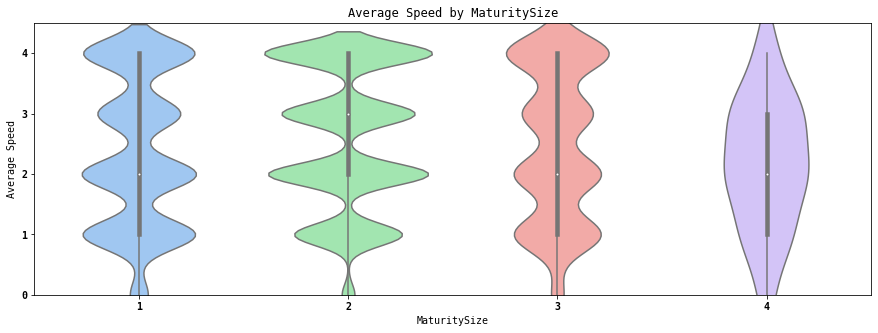

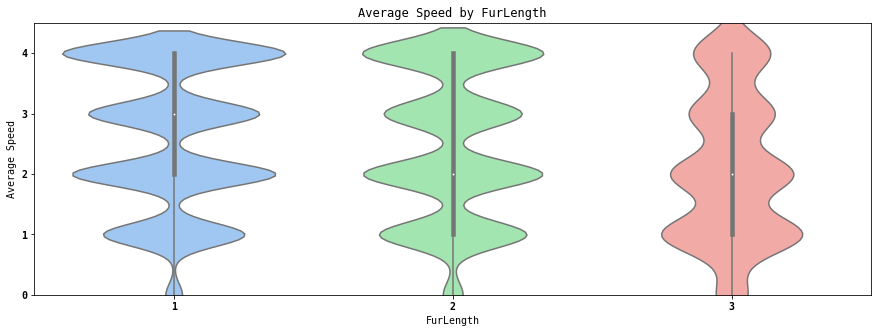

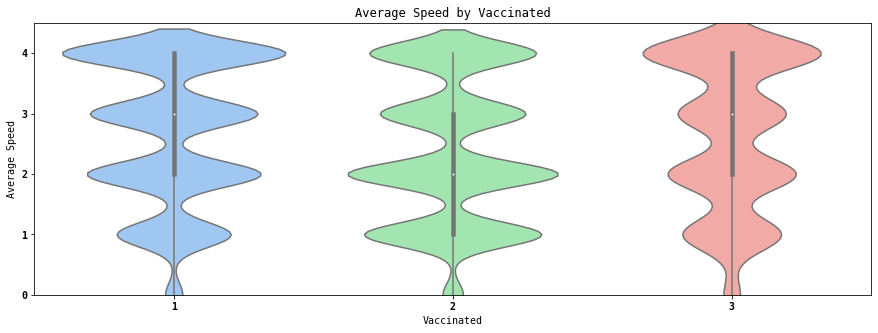

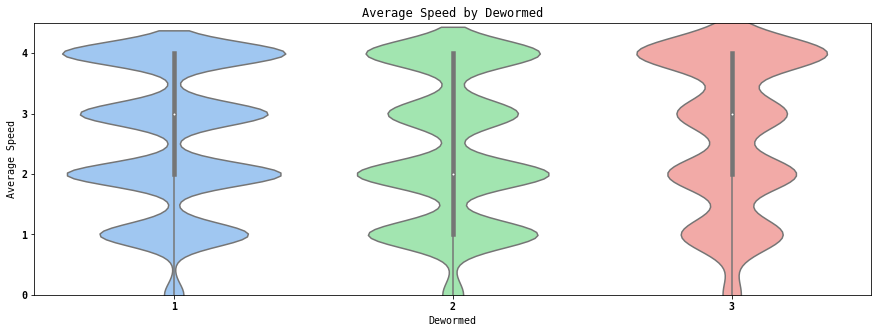

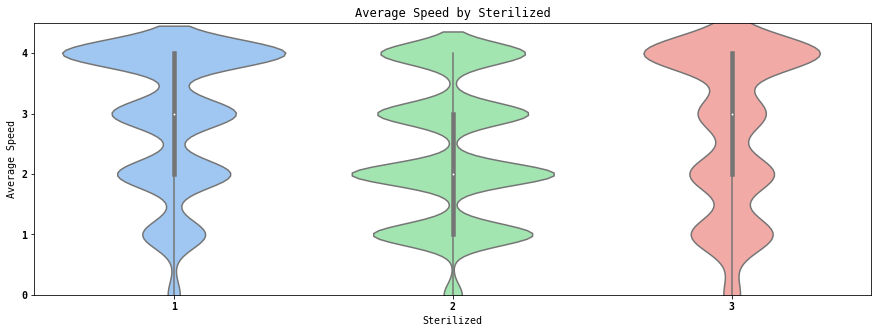

In [70]:
important_variables = ["MaturitySize", "FurLength","Vaccinated", "Dewormed", "Sterilized"]

for i in important_variables:
    
    ax = sns.violinplot(x=i, y="AdoptionSpeed", data=train, showfliers = False)
#     ax = sns.swarmplot(x=i, y="AdoptionSpeed", data=train, color=".25")

    plt.ylabel('Average Speed')
    plt.xticks(rotation=0)
    plt.yticks([0,1,2,3,4])
    plt.ylim(0,4.5)
    plt.title('Average Speed by {}'.format(i))
    plt.show()
#   train.boxplot("AdoptionSpeed", by=i)
    

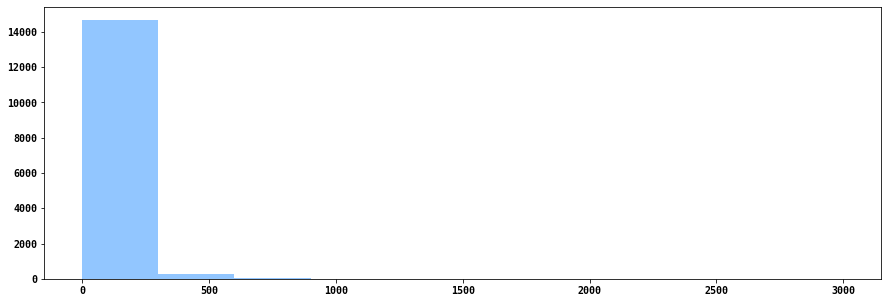

In [71]:
train.Fee.hist(grid=False)

### NLP

In [72]:
import nltk
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import brown

from wordcloud import WordCloud

from collections import Counter

import re
import copy

stop = stopwords.words('english')
ps = PorterStemmer()
wn = WordNetLemmatizer()
word_list = brown.words()
word_set = set(word_list)

In [73]:
print(f'Number of unique values in keyword = {train["Description"].nunique()} (Training) - {test["Description"].nunique()} (Test)')

Number of unique values in keyword = 14032 (Training) - 3723 (Test)


In [74]:
#Desired Variables 
df_nlp = train[['Description','Type', 'AdoptionSpeed']].dropna(how='any')

In [75]:
df_nlp['Type'] = df_nlp['Type'].replace(2,"Cat")
df_nlp['Type'] = df_nlp['Type'].replace(1,"Dog")

In [76]:
#Feature Extraction 
df_nlp['length'] = df_nlp['Description'].apply(len)
df_nlp['word_count'] = df_nlp['Description'].apply(lambda x: len(str(x).split(" ")))
df_nlp['sent_count'] = df_nlp['Description'].apply(lambda x: len(sent_tokenize(str(x))))

df_nlp.head()

,Description,Type,AdoptionSpeed,length,word_count,sent_count
0,Nibble is a 3+ month old ball of cuteness. He ...,Cat,2,359,69,6
1,I just found it alone yesterday near my apartm...,Cat,0,118,23,2
2,Their pregnant mother was dumped by her irresp...,Dog,3,393,69,7
3,"Good guard dog, very alert, active, obedience ...",Dog,2,146,25,2
4,This handsome yet cute boy is up for adoption....,Dog,2,390,81,6


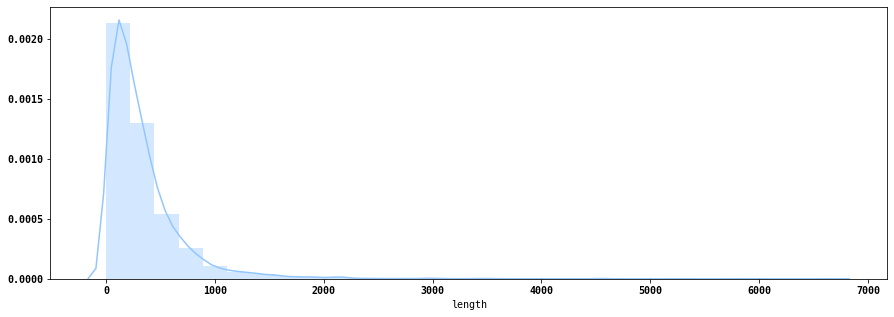

In [77]:
sns.distplot(df_nlp['length'], bins=30)

In [78]:
df_nlp['word_count'].max()

1257

In [79]:
df_nlp[df_nlp['word_count']==1257]['Description'].iloc[0]

'Gabby is a beautiful sleek black puppy, estimated to be at 3 months old when she turned up. That was in March . Gabby is a lovely quiet dog that hardly barks. She loves to sit and watch us when we are gardening, or sit with us when we are at ease at the porch area. Our friends who visited us, remarked what a gentle soul Gabby is. The children had no problems playing with her as Gabby is not rough. We have recently had a BBQ party & we\'ve received encouraging remarks that Gabby does not paw, bite or disturb any of the guests when they eat or drink. Gabby was lured to our neighborhood by an irresponsible family who was unable to care for her. We gave our home as Gabby\'s shelter, in order for Gabby to be safe from traffic, pedestrian abuse and harsh outdoor weather. This beautiful puppy is growing up in our compound and is turning out to be a gentle dog who loves long walks, tummy rubs, sitting with us during evenings, and lots of loving attention. We would like to find Gabby a forever

In [80]:
df_nlp[df_nlp['word_count'] == df_nlp['word_count'].min()]['Description'].iloc[6]

'小豹纹是一只两个月大的女生。她的性格非常活泼可爱。现在寻找一个有爱心，有耐心和有经济能力的有缘人来领养她。请一定要带她打三支预防针，过后每年打一支以及每个月放猫虱药。漂亮可爱的她在等着你带她回去哦!'

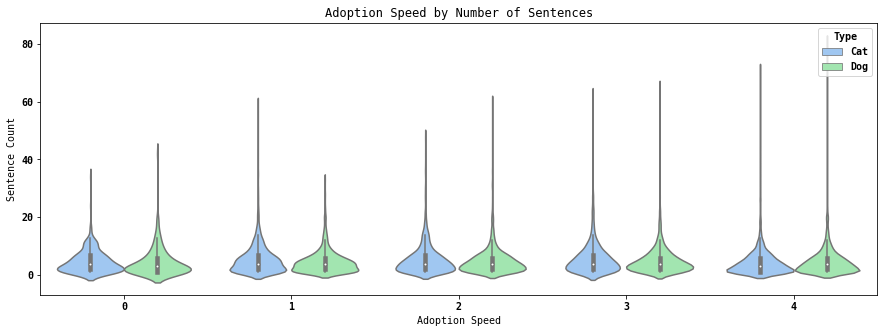

In [81]:
sns.violinplot(x='AdoptionSpeed',y='sent_count',data=df_nlp, fliersize=.7, hue = 'Type')

plt.xlabel("Adoption Speed")
plt.ylabel("Sentence Count")
plt.title("Adoption Speed by Number of Sentences")

plt.show()

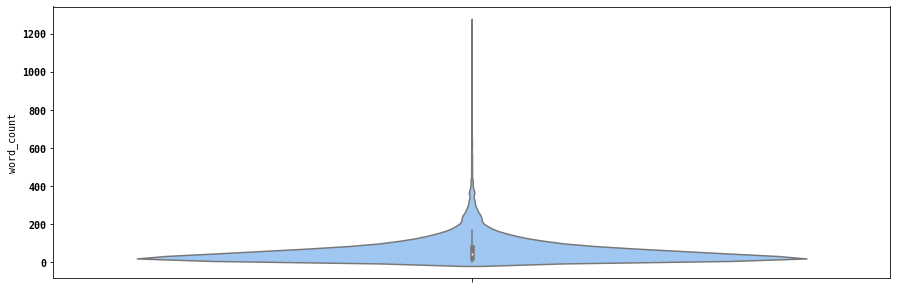

In [82]:
sns.violinplot(y=df_nlp["word_count"])

In [83]:
df_nlp['sent_count'] = df_nlp['Description'].apply(lambda x: len(sent_tokenize(str(x))))
df_nlp.head(15)

,Description,Type,AdoptionSpeed,length,word_count,sent_count
0,Nibble is a 3+ month old ball of cuteness. He ...,Cat,2,359,69,6
1,I just found it alone yesterday near my apartm...,Cat,0,118,23,2
2,Their pregnant mother was dumped by her irresp...,Dog,3,393,69,7
3,"Good guard dog, very alert, active, obedience ...",Dog,2,146,25,2
4,This handsome yet cute boy is up for adoption....,Dog,2,390,81,6
5,This is a stray kitten that came to my house. ...,Cat,2,87,18,2
6,anyone within the area of ipoh or taiping who ...,Cat,1,400,78,2
7,Siu Pak just give birth on 13/6/10 to 6puppies...,Dog,3,109,20,3
8,"healthy and active, feisty kitten found in nei...",Cat,1,79,13,2
9,"Very manja and gentle stray cat found, we woul...",Cat,4,232,45,3


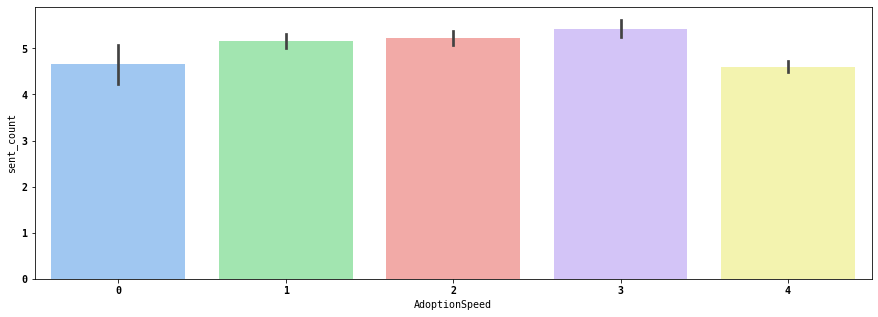

In [84]:
sns.barplot(x='AdoptionSpeed',y='sent_count',data=df_nlp)

[(0, 20)]

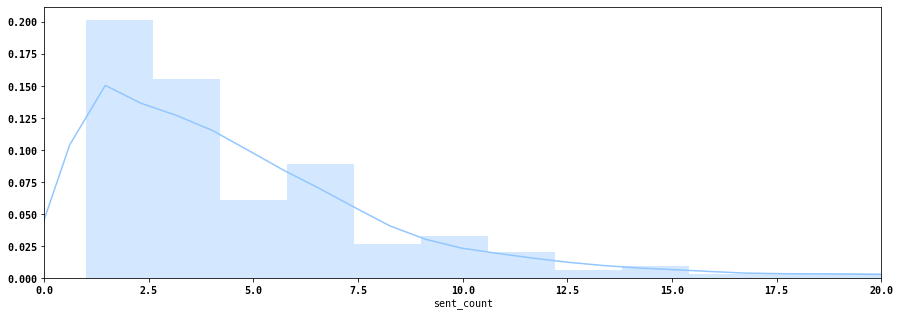

In [85]:
ax = sns.distplot(df_nlp['sent_count'])
ax.set(xlim=(0, 20))

### Pre-processing

In [86]:
#Edit Contractions

contractions = { 
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [87]:
# #Add common pet words to stop words

stop.extend(['adopt','love','home','dog','cat','--','puppy','kitten','play','dnd', 'found','find','rescue','rescu','look',])
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [88]:
def clean_tkn(token):
    
    token = word_tokenize(token.lower())
    
    tkn = [contractions[word] if word in contractions else word for word in token]
    
    tkn = [re.sub('\d+','', i) for i in tkn]
    tkn = [re.sub('[(|..)|)]',' ', i) for i in tkn]
    tkn = [re.sub('W+',' ', i) for i in tkn]
    
    tkn = " ".join([word for word in tkn if word not in stop and word not in string.punctuation and word in word_set])
    
    return tkn

### Stemming

In [89]:
def stemming(text):
    text = [ps.stem(w) for w in text.split()]
    text = " ".join([w for w in text if w not in stop])
    return text

### Word Cloud

In [90]:
df_nlp['Description_Clean'] = df_nlp['Description'].apply(lambda x: clean_tkn(x))
df_nlp['Description_Stem'] = df_nlp['Description_Clean'].apply(lambda x: stemming(x))

In [91]:
from PIL import Image

def filter(data, pet):
    data = data[data['Type'] == pet]
    
    wc_string = ','.join(list(data['Description_Stem'].values))
    
    
    #Generate Word Cloud
    plt.figure(figsize=(60,30))
    
    my_cloud = WordCloud(width=3600, height=2400,contour_width=5,
                     max_words = 30, colormap=plt.cm.cool,background_color = 'lightgray').generate(str(wc_string))
    
    cnt = freq(wc_string,my_cloud)
    
    plt.imshow(my_cloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

#     return (adoption_speed,wordcloud,cnt)

def freq(str,cloud):
  
    # break the string into list of words 
    str_list = str.split() 
  
    # gives set of unique words 
    unique_words = list(str_list)
    
    cnt = Counter()

    for word in unique_words:
        if word not in cloud.stopwords:
            cnt[word] += 1

    return cnt

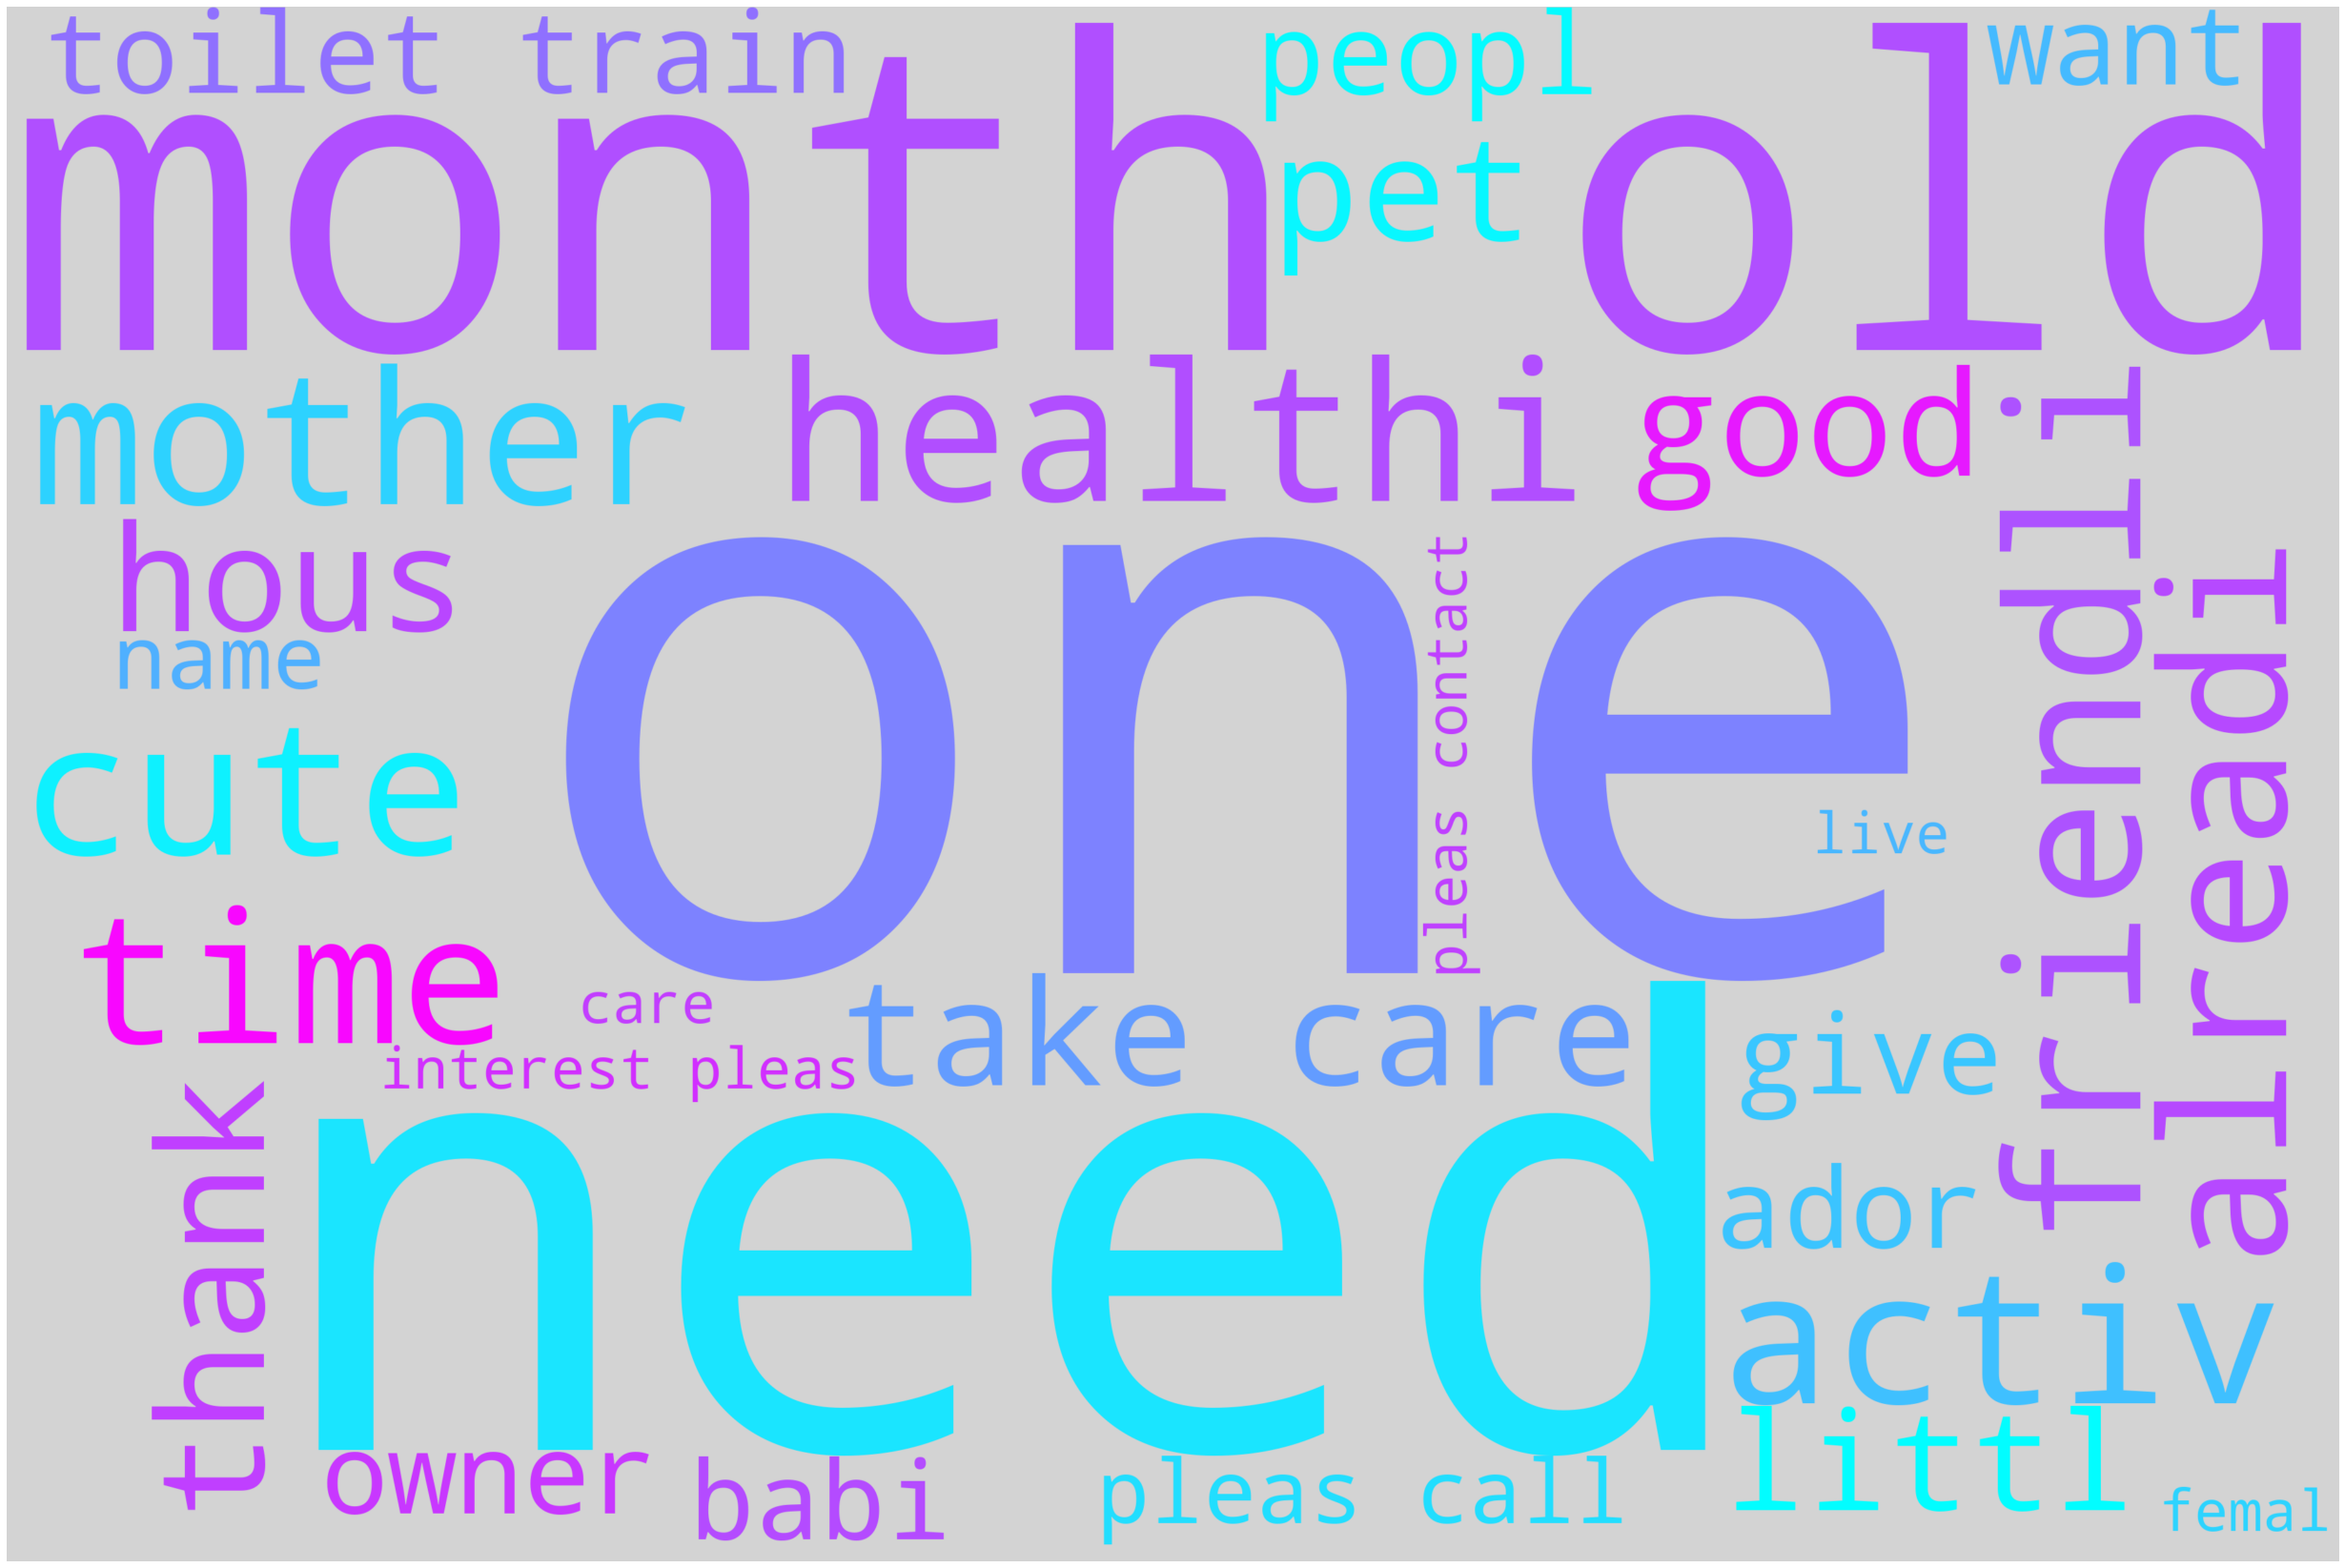

In [92]:
#Adoption Speed of Lower than 2
slow = df_nlp[df_nlp['AdoptionSpeed'] <= 2]
       
filter(slow, pet= 'Cat')

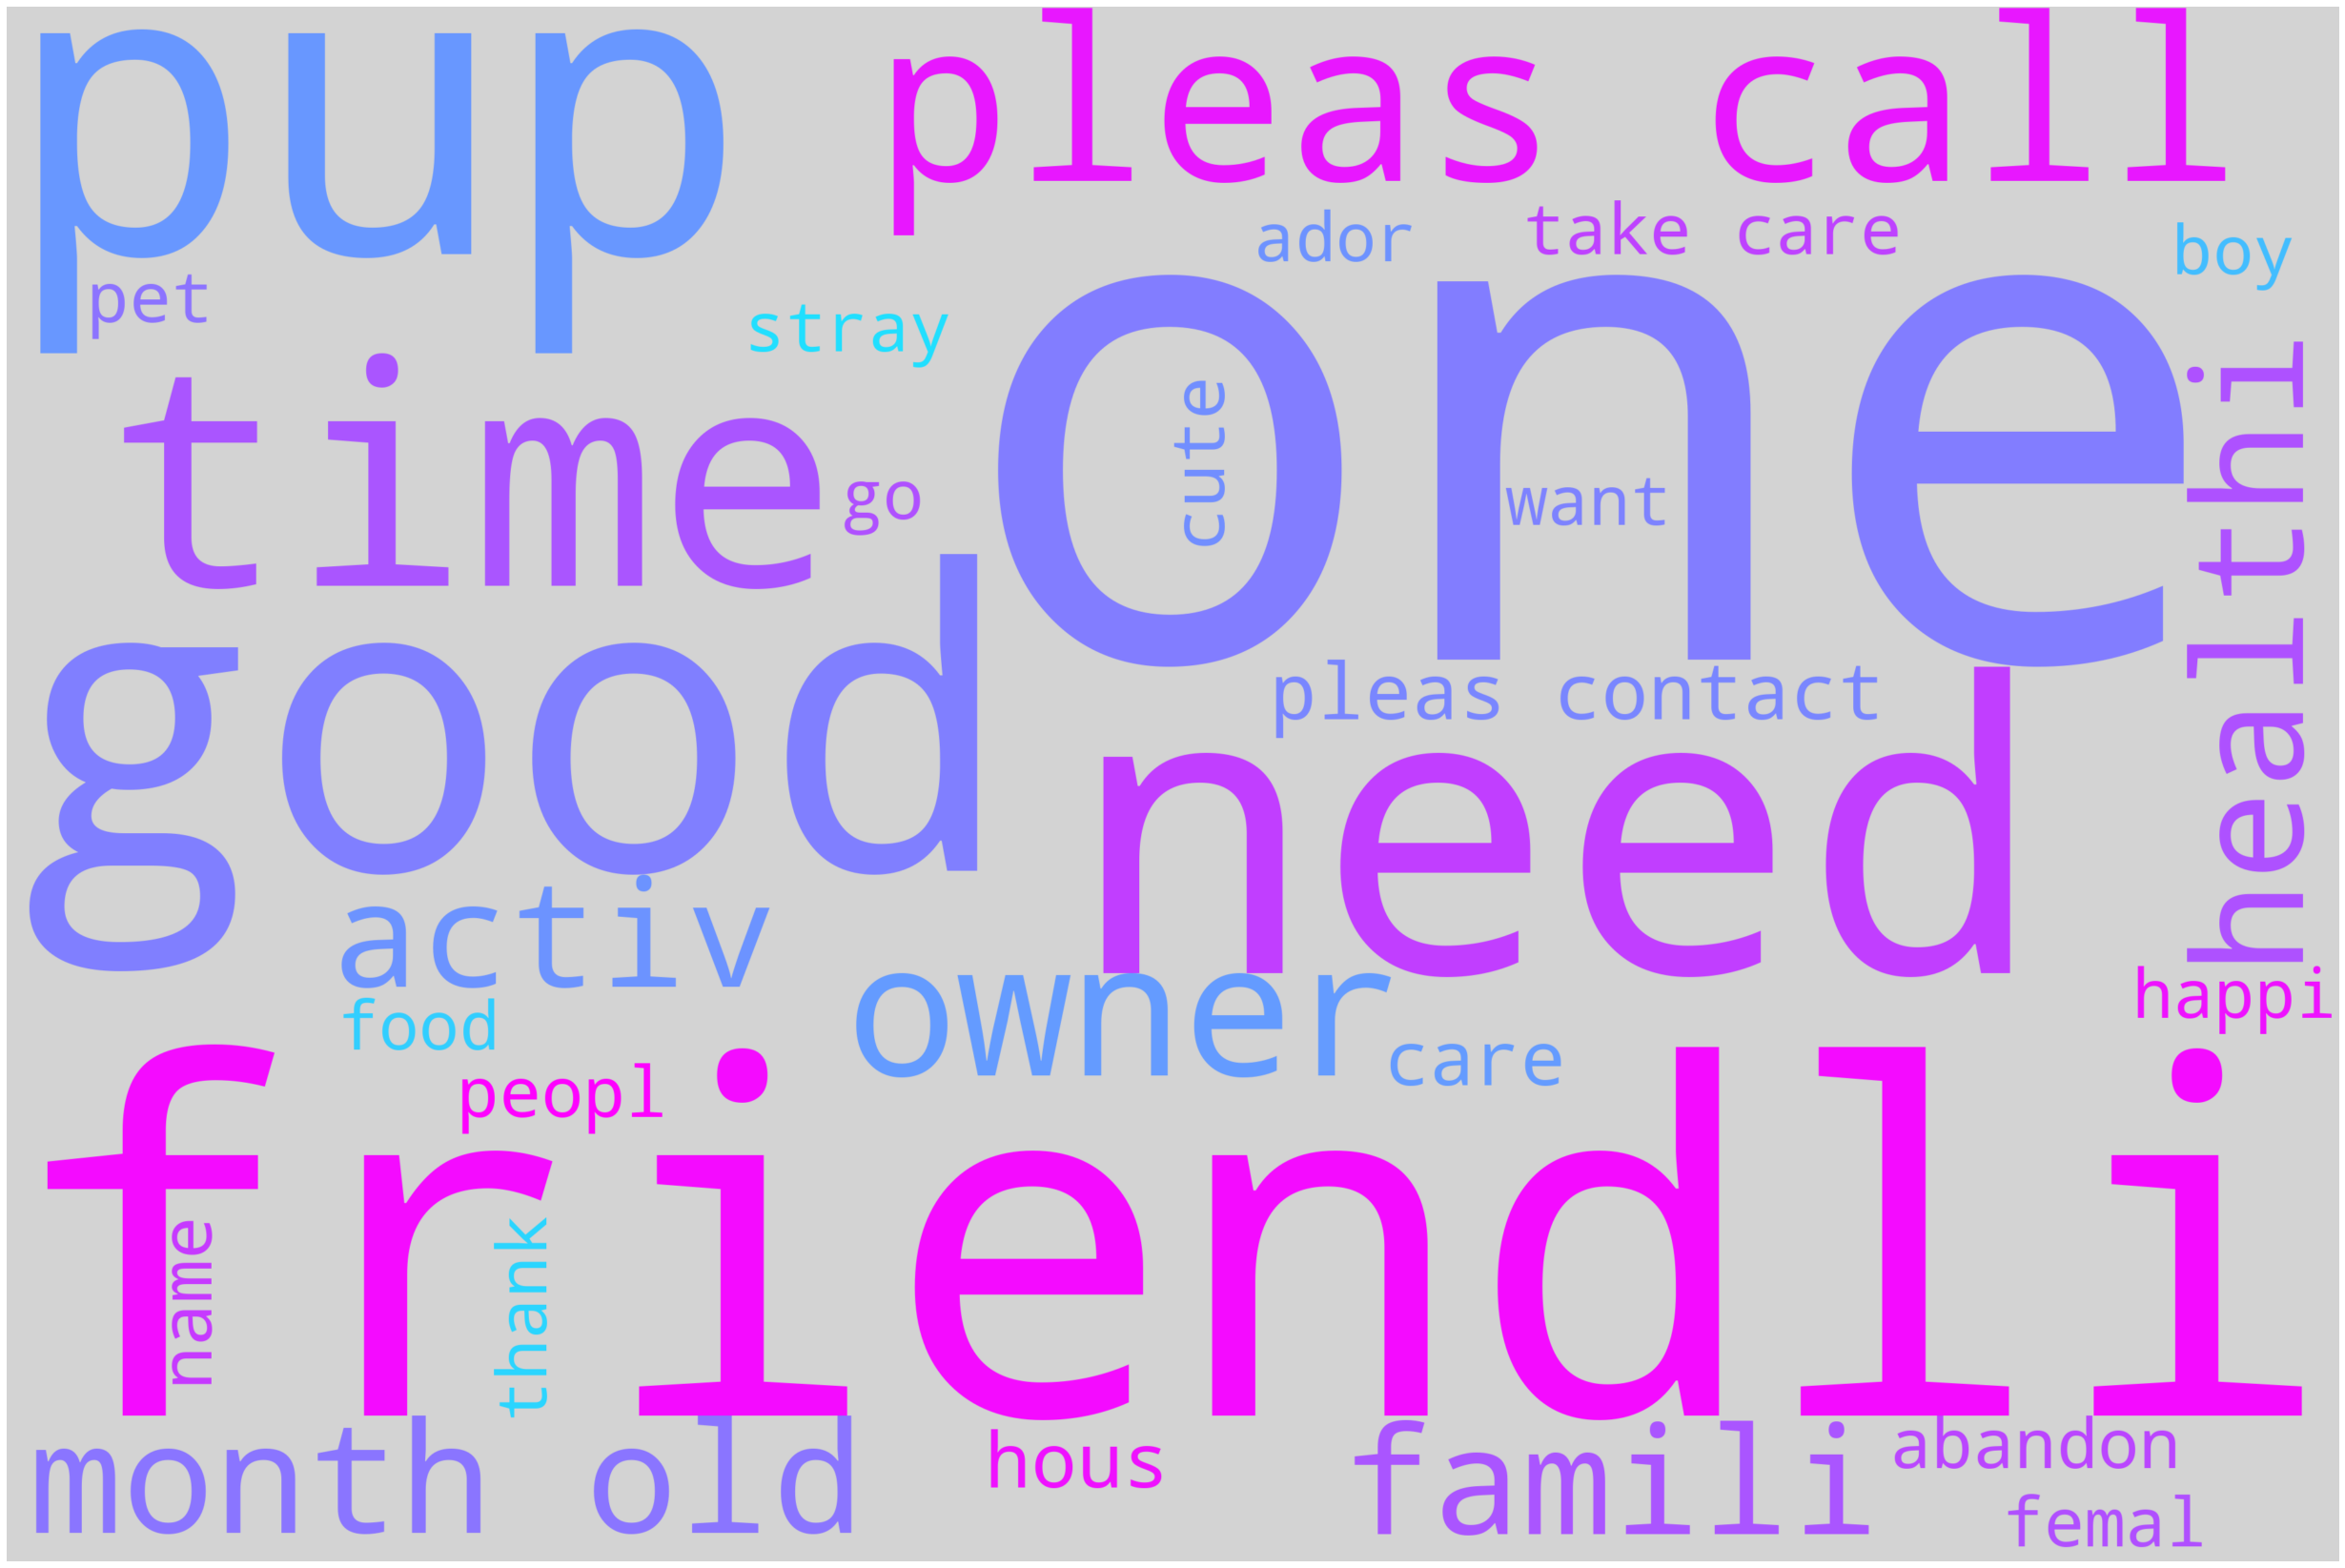

In [93]:
#Adoption Speed of Greater than 2
fast = df_nlp[df_nlp['AdoptionSpeed'] > 2]
       
filter(fast, pet= 'Dog')

In [94]:
def show_wordcloud(data):
    
    plt.figure(figsize=(60,30))
    my_cloud = WordCloud(width=3600, height=2400,contour_width=5, contour_color='lightblue',
                     max_words = 30, colormap=plt.cm.cool,background_color = 'lightgray').generate(str(data))
    
    plt.imshow(my_cloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

### Multi-nomial Naive Bayes

In [95]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [96]:
train_nlp = train[['Description', 'AdoptionSpeed']].dropna(how='any')
test_nlp = test[['Description']].dropna(how='any')

In [97]:
#Process Data

train_nlp['Description_Clean'] = train_nlp['Description'].apply(lambda x: clean_tkn(x))
train_nlp['Description_Stem'] = train_nlp['Description_Clean'].apply(lambda x: stemming(x))

In [98]:
train_nlp.head()

,Description,AdoptionSpeed,Description_Clean,Description_Stem
0,Nibble is a 3+ month old ball of cuteness. He ...,2,month old ball energetic playful rescued coupl...,month old ball energet coupl month ago could g...
1,I just found it alone yesterday near my apartm...,0,alone yesterday near apartment shaking bring p...,alon yesterday near apart shake bring provid t...
2,Their pregnant mother was dumped by her irresp...,3,pregnant mother dumped irresponsible owner roa...,pregnant mother dump irrespons owner roadsid n...
3,"Good guard dog, very alert, active, obedience ...",2,good guard alert active obedience waiting good...,good guard alert activ obedi wait good master ...
4,This handsome yet cute boy is up for adoption....,2,handsome yet cute boy adoption playful pal see...,handsom yet cute boy pal seen shoelac chase yo...


In [99]:
test_nlp = pd.concat([test_nlp, pd.DataFrame(columns = ['AdoptionSpeed'])],axis=1)

In [100]:
X_Data = train_nlp['Description_Stem']
Y_Data = train_nlp['AdoptionSpeed']

cv= CountVectorizer()

X_Data = cv.fit_transform(X_Data)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.3,random_state=101)

model = MultinomialNB()
model.fit(X_Train, Y_Train)
y_pred = model.predict(X_Test)
print(classification_report(Y_Test,y_pred))

acc_score = accuracy_score(Y_Test,y_pred)

print('Total accuracy classification score: {}'.format(acc_score))

              precision    recall  f1-score   support

           0       0.27      0.02      0.04       124
           1       0.29      0.22      0.25       923
           2       0.30      0.36      0.33      1220
           3       0.30      0.21      0.25       968
           4       0.39      0.52      0.44      1260

    accuracy                           0.33      4495
   macro avg       0.31      0.27      0.26      4495
weighted avg       0.32      0.33      0.32      4495

Total accuracy classification score: 0.33303670745272523


### Emotion in Description

In [116]:
emotion_df = pd.read_csv("train/train.csv")
color_df = pd.read_csv('ColorLabels.csv')

In [117]:
upd_df = pd.merge(emotion_df,breed_df, how = "left", left_on = 'Breed1', right_on = 'BreedID')
upd_df = pd.merge(upd_df,breed_df, how = "left", left_on = 'Breed2', right_on = 'BreedID')
upd_df = pd.merge(upd_df,color_df, how = "left", left_on = 'Color1', right_on = 'ColorID')
upd_df = pd.merge(upd_df,color_df, how = "left", left_on = 'Color2', right_on = 'ColorID')

In [118]:
#Clean Breed Columns
cols = ['BreedName_x', 'BreedName_y']
upd_df["Breed"] = upd_df[cols].apply(lambda x: ', '.join(x.dropna()), axis=1)

In [119]:
#Clean Color Columns
cols = ['ColorName_x','ColorName_y']
upd_df["Colors"] = upd_df[cols].apply(lambda x: ', '.join(x.dropna()), axis=1)

In [120]:
upd_df.columns.to_list()

['Type_x',
 'Name',
 'Age',
 'Breed1',
 'Breed2',
 'Gender',
 'Color1',
 'Color2',
 'Color3',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Dewormed',
 'Sterilized',
 'Health',
 'Quantity',
 'Fee',
 'State',
 'RescuerID',
 'VideoAmt',
 'Description',
 'PetID',
 'PhotoAmt',
 'AdoptionSpeed',
 'BreedID_x',
 'Type_y',
 'BreedName_x',
 'BreedID_y',
 'Type',
 'BreedName_y',
 'ColorID_x',
 'ColorName_x',
 'ColorID_y',
 'ColorName_y',
 'Breed',
 'Colors']

In [121]:
upd_df = upd_df[['PetID', 'AdoptionSpeed','Type_x','Age','Gender','MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee','VideoAmt','PhotoAmt','State', 'Breed', 'Colors']]

In [122]:
upd_df = upd_df.rename(columns={'Type_x': 'Type'})

In [123]:
upd_df['Breed'] = upd_df['Breed'].str.replace(r'.*,.*','Mixed Breed',regex=True)

In [124]:
upd_df.to_csv('updated_train.csv')

### New Dataset (Include 2 New Features)

In [125]:
#Updated Dataset with 2 New Features
emotion_df = pd.read_csv('3k_pets_with_scores_and_emotion.csv')

In [126]:
#Create Cat and Dog DataFrame
dog_df = emotion_df[emotion_df.Type_Dog == 1]
cat_df = emotion_df[emotion_df.Type_Dog == 0]

In [127]:
dog_df.drop('Type_Dog',axis=1,inplace=True)
cat_df.drop('Type_Dog',axis=1,inplace=True)

In [128]:
#Create Datasets for Modeling
dog_train = dog_df.sample(frac=0.6,random_state=200)
dog_test = dog_df.drop(dog_train.index)
dog_validation = dog_test.sample(frac = .375, random_state=200)
dog_test = dog_test.drop(dog_validation.index)

dog_train.to_csv('dog_training_data.csv')
dog_validation.to_csv('dog_valiation_data.csv')
dog_test.to_csv('dog_test_data.csv')

In [129]:
cat_train = cat_df.sample(frac=0.6,random_state=200)
cat_test = cat_df.drop(cat_train.index)
cat_validation = cat_test.sample(frac = .375, random_state=200)
cat_test = cat_test.drop(cat_validation.index)

cat_train.to_csv('cat_training_data.csv')
cat_validation.to_csv('cat_valiation_data.csv')
cat_test.to_csv('cat_test_data.csv')